<a href="https://colab.research.google.com/github/pumazzo/DnCNN-tf2/blob/master/notebooks/es10/AML_2024_HandsOn_10_IG_tracIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# xAI handOn based on the first one!

Slide for the day with the Task Description ([SLIDE](https://docs.google.com/presentation/d/1DCZn-I8bXQ_awkmR6I6u9be4MCHB0ljWTxBL9koOsXo/edit?usp=sharing))

Jamboard for first RiNNGs ([BOARD](https://jamboard.google.com/d/1n694UZc-sQK2AZnI4RX88d-hoPytOPo_-5wnt3Bwlbc/edit?usp=sharing))

Jamborad for today ([BOARD](https://jamboard.google.com/d/1MAaDvaBTjy3RluS62r8mXKiOI6ZWDKc8Mn7BZap62eA/edit?usp=sharing))

[PAPER INTEGRATED GRADIENTS](https://arxiv.org/pdf/1703.01365.pdf)

[PAPER TRACIN](https://arxiv.org/pdf/2002.08484.pdf)

# Connect your drive!

In [1]:
from google.colab import drive
import numpy as np

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
!cd /content/gdrive/MyDrive/RiNNgs # this one may be different from mine

In [3]:
!ls

gdrive	sample_data


In [4]:
# we need to get some files from github
import os
success = os.path.exists("./data_preprocess.py")
if not success:

  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py

--2024-05-07 10:03:06--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14603 (14K) [text/plain]
Saving to: ‘data_preprocess.py’

data_preprocess.py  100%[===================>]  14.26K  --.-KB/s    in 0s      

2024-05-07 10:03:06 (46.8 MB/s) - ‘data_preprocess.py’ saved [14603/14603]



In [5]:
!ls

data_preprocess.py  gdrive  sample_data


# Lets create all the folders needed

In [6]:
import os
def CreateDir(path):
	# Create a directory if it does not exist
	success = os.path.exists(path)
	if not success:
		os.makedirs(path)
CreateDir("results")#
CreateDir("results/display")
CreateDir("results/preprocess")
CreateDir("data")

In [7]:
success = os.path.exists("data/event_08011.file")
if not success:
  ! wget  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file -P data/
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/data_08011.json

--2024-05-07 10:03:06--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375770 (367K) [application/octet-stream]
Saving to: ‘data/event_08011.file’

event_08011.file    100%[===================>] 366.96K  --.-KB/s    in 0.03s   

2024-05-07 10:03:07 (10.9 MB/s) - ‘data/event_08011.file’ saved [375770/375770]

--2024-05-07 10:03:07--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

# We need to build the dataset.
How can we call a python code from a notebook script?

Use the command


```
! python script.py ARG1,ARG2,...,ARGN
```

to call the "data_preprocess.py" that will find the run 0811 and form 16x16 images from it.

arguments are "08011 Conv 16 np_reco 0"

**Ignore all the warnings and the tensorflow calls. This function is doing a lot more than what we need**

In [8]:
dataset = "08011"
success = os.path.exists('results/preprocess/' + 'x_all_{}.npy'.format(dataset))
if not success:
  ! python data_preprocess.py 08011 Conv 16 np_reco 0


x_all =  np.load('results/preprocess/' + 'x_all_{}.npy'.format(dataset))
y_all = np.load('results/preprocess/' + 'y_all_{}.npy'.format(dataset))

2024-05-07 10:03:15.106478: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 10:03:15.106565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 10:03:15.113443: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 10:03:15.127435: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 10:03:19.246579: W tensorflow/compiler/tf2

# Where are our files?

The script will write two files in the results/preprocess folder that we created before.

Check if you can find the files and that  *x_all_** is the rigth size (around 40 MB)

Use the command


```
ls -lh "path"
```



In [9]:
! ls -lh  results/preprocess/

total 40M
-rw-r--r-- 1 root root  82K May  7 10:03 prova16.pdf
-rw-r--r-- 1 root root  40M May  7 10:03 x_all_08011.npy
-rw-r--r-- 1 root root 313K May  7 10:03 y_all_08011.npy


# Read the data, check the data format, print an element.


*   Load the data with np.load
*   Print the data shape
*   Check the variable type
*   Use plt.matshow() to print an element



In [10]:

# remove the empty images
def remove_empty(x_all, y_all):
  intensities = x_all.reshape(x_all.shape[0],-1).sum(axis=1)
  y_all = y_all[intensities>5]
  x_all = x_all[intensities>5]
  return x_all, y_all

x_all, y_all = remove_empty(x_all, y_all)


[0. 1.]


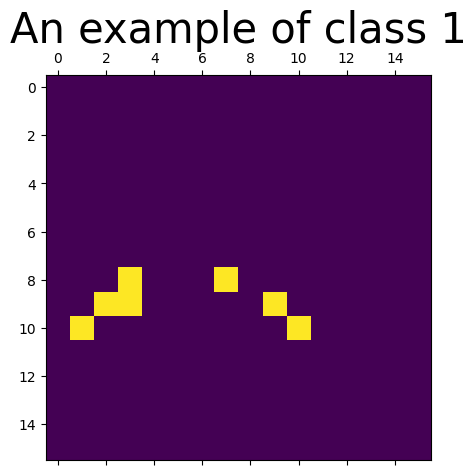

In [11]:
import matplotlib.pyplot as plt
to_plot = 10
def plot_example(image,lab):
  f,ax = plt.subplots(1,1,figsize=(5,5))
  ax.matshow(image)
  ax.set_title("An example of class {}".format(np.argmax(lab)),fontsize=30)
  print(np.unique(image))
plot_example(x_all[to_plot,:,:],y_all[to_plot])

# Load images and prepare batches

In [12]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.utils.data as data

#data augmentation
def remove_a_hit(image):
  if image.sum()<3:
    return image
  a,b = np.nonzero(image)
  i = np.random.randint(0,len(a))
  image[a[i],b[i]] -=1
  return image

def add_a_hit(image):
  image[np.random.randint(0,16),np.random.randint(0,16)] +=1
  return image

def flip_hit(image):
  if np.random.rand()>0.5:
    image= np. fliplr(image)
  else:
    image= np. flipud(image)
  return image

def sum_images(image,lab,image2,lab2):
  lab=np.argmax(lab)
  lab2=np.argmax(lab2)
  image = image + image2
  lab = lab + lab2
  if lab>3:
    lab=3
  lab_tmp = np.zeros(4)
  lab_tmp[lab]=1

  return image,lab_tmp


class HitImageGenerator(Dataset):


    def __init__(self, X,y,AUGMENT=False):
        self.X = X
        self.y = y
        self.AUGMENT = AUGMENT

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx]
        label = self.y[idx]
        iclass = np.argmax(label)
        #image = (image-image.reshape(-1).mean())/image.reshape(-1).std()

        if self.AUGMENT:# a simple data augmentation (only for training)
          if iclass >1:
            if np.random.rand()>1:# validation shows it may be not helpful so turned off
              image = remove_a_hit(image)
          if np.random.rand()>1:# validation shows it may be not helpful so turned off
            image = add_a_hit(image)
          if np.random.rand()>0.5:# this semms helpful
            image = flip_hit(image)
          if np.random.rand()>0.95:
            id2=np.random.randint(len(self.X))
            image2 = self.X[id2]
            lab2 = self.y[id2]
            image, label = sum_images(image,label,image2,lab2)


        image=image/image.sum()# normalization
        tensor_image = torch.from_numpy(image).unsqueeze(0).float()
        tensor_label = torch.from_numpy(label).float()
        return tensor_image, tensor_label

class BalancedDataLoader(data.DataLoader):
    def __init__(self, dataset, batch_size=1, shuffle=True):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle

        # If sampler is not provided, create a new one

        # Count the number of samples in each class
        class_counts = torch.bincount(torch.tensor(np.argmax(dataset.y,axis=1)))

        # Compute the weight of each sample
        weights = 1.0 / class_counts[np.argmax(dataset.y,axis=1)]# has the same length on the data array

        # Create a sampler that samples each class with equal probability
        sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))

        super().__init__(dataset, batch_size=batch_size, sampler=sampler)



In [30]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you have X_train, y_train, X_val, y_val, X_test, and y_test as your splits


# Lets split the dataset

train_dataset = HitImageGenerator(X_train,y_train,AUGMENT=True)
train_loader = BalancedDataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = HitImageGenerator(X_val,y_val)
val_loader = BalancedDataLoader(val_dataset, batch_size=128, shuffle=False)

test_dataset = HitImageGenerator(X_test,y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)# no balanced generator for the test

In [33]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,16, 2)# 4*4 * 32 + 32 N parameter of the first conv layer
        self.conv1_1 = nn.Conv2d(16,16, 2)
        self.conv1_2 = nn.Conv2d(16,32, 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 2)
        self.conv2_1 = nn.Conv2d(32, 64, 2)
        self.conv2_2 = nn.Conv2d(64, 64, 2)
        self.fc1 = nn.Linear(64 , 64) # 64*64  64
        self.fc2 = nn.Linear(64, 64)
        self.dpo1 = nn.Dropout(p=0.3)
        self.fc3 = nn.Linear(64,4)

    def forward(self, x):

       x = self.conv1(x)
       x = F.relu(x)
       x = self.conv1_1(x)
       x = F.relu(x)
       x = self.conv1_2(x)
       x = F.relu(x)
       x = self.pool(x)
       x =F.relu(self.conv2(x))
       x =F.relu(self.conv2_1(x))
       x = self.pool(F.relu(self.conv2_2(x)))
       x = torch.flatten(x, 1) # flatten all dimensions except batch

       x = F.relu(self.fc1(x))
       x = self.dpo1(x)
       x = F.relu(self.fc2(x))
       x = self.dpo1(x)
       x = self.fc3(x)# the crossentropy loss in pytorch to the softmax for you


       return x


model = Net()

In [34]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()# I want to minimize it
optimizer = optim.Adam(model.parameters(), lr=0.003)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

In [35]:
def accuracy(y_pred, y_true):
    """
    Calculates the accuracy of the predicted labels.

    Args:
        y_pred (torch.Tensor): predicted labels
        y_true (torch.Tensor): true labels

    Returns:
        float: accuracy score
    """
    # Get the predicted class by finding the index of the maximum value along axis 1
    y_pred = torch.argmax(y_pred, axis=1)
    y_true = torch.argmax(y_true, axis=1)

    # Calculate the number of correctly classified examples
    correct = (y_pred == y_true).sum().item()

    # Calculate the total number of examples
    total = len(y_true)

    # Calculate the accuracy
    acc = correct / total

    return acc

In [36]:
# Define the number of epochs and the patience for early stopping
num_epochs = 120
patience = 20
TRAIN = 1

# Initialize the variables for tracking the best validation accuracy and the number of epochs since the best accuracy
best_val_acc = 0.0
epochs_since_best_val_acc = 0

train_curve=[]
val_curve=[]
lr_curve=[]

lr_ckp=[]

if TRAIN:
  # Train loop
  for epoch in range(num_epochs):# the network train on all the elements
      # Training
      model.train()
      tmp_loss = 0
      for batch_idx, (data, target) in enumerate(train_loader): # divide the problem in batches
          # Forward pass


          output = model(data)# output will be something [batch,4]
          loss = criterion(output, target)

          # Backward pass and optimization
          optimizer.zero_grad()# clear the previous gradients
          loss.backward()# compute gradient of loss
          optimizer.step()# update the weigths

          tmp_loss += loss.detach().numpy()

      if epoch > 20:
        scheduler.step()

      lr_curve.append(optimizer.param_groups[0]['lr'])
      train_curve.append(tmp_loss/len(train_loader))
      # Validation
      model.eval() # the validation step do NOT change the parameters
      with torch.no_grad():
          val_acc = 0.0
          val_total = 0
          val_loss = 0
          for data, target in val_loader:
              output = model(data)
              val_loss += criterion(output, target).item()


              val_acc += accuracy(output, target)

          val_acc /=  len(val_loader)
          val_loss /= len(val_loader)
          val_curve.append(val_loss)

          print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}, lr: {optimizer.param_groups[0]['lr']:.3e}")

          # Check if the validation accuracy has improved
          if val_acc > best_val_acc:
              best_val_acc = val_acc
              epochs_since_best_val_acc = 0
              best_weights = model.state_dict()
              torch.save(best_weights, 'results/best_weights.pth')
              print("Best!")
              best_epoch = epoch
          else:
              epochs_since_best_val_acc += 1

          if ((epoch+1) % 10)==0 & (epoch<60) :

            weights = model.state_dict()
            torch.save(weights, 'results/ckp_{}.pth'.format(epoch+1))
            print("ckp saved!")
            lr_ckp.append(optimizer.param_groups[0]['lr'])

          # Check if early stopping is necessary
          if epochs_since_best_val_acc >= patience:
              print("Early stopping!")
              break


  np.save("lr_ckp.npy",lr_ckp)
lr_ckp = np.load("lr_ckp.npy")

Epoch 1, Validation Loss: 1.3866, Validation Accuracy: 0.2561, lr: 3.000e-03
Best!
Epoch 2, Validation Loss: 1.3894, Validation Accuracy: 0.2494, lr: 3.000e-03
Epoch 3, Validation Loss: 1.3877, Validation Accuracy: 0.2514, lr: 3.000e-03
Epoch 4, Validation Loss: 1.2054, Validation Accuracy: 0.3942, lr: 3.000e-03
Best!
Epoch 5, Validation Loss: 0.9086, Validation Accuracy: 0.5824, lr: 3.000e-03
Best!
Epoch 6, Validation Loss: 0.9231, Validation Accuracy: 0.5344, lr: 3.000e-03
Epoch 7, Validation Loss: 0.8706, Validation Accuracy: 0.5917, lr: 3.000e-03
Best!
Epoch 8, Validation Loss: 0.8238, Validation Accuracy: 0.6370, lr: 3.000e-03
Best!
Epoch 9, Validation Loss: 0.8135, Validation Accuracy: 0.6185, lr: 3.000e-03
Epoch 10, Validation Loss: 0.8277, Validation Accuracy: 0.6445, lr: 3.000e-03
Best!
ckp saved!
Epoch 11, Validation Loss: 0.7670, Validation Accuracy: 0.6504, lr: 3.000e-03
Best!
Epoch 12, Validation Loss: 0.8388, Validation Accuracy: 0.6087, lr: 3.000e-03
Epoch 13, Validation

In [18]:
! pwd

/content


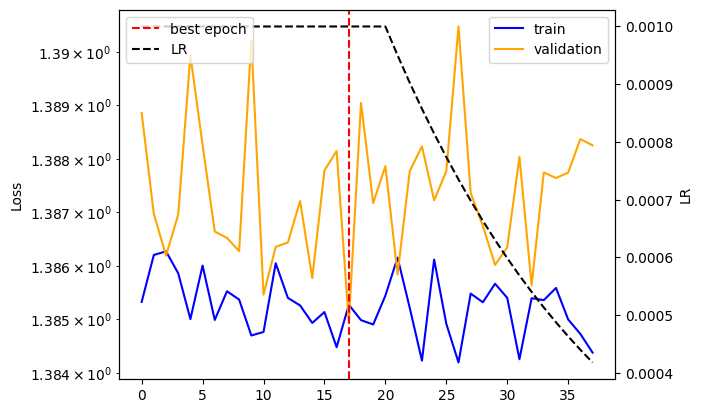

In [19]:
if TRAIN:
  f,ax = plt.subplots(1,1)
  ax2 = ax.twinx()
  ax.plot(train_curve,label="train",color="blue")
  ax.plot(val_curve,label="validation",color="orange")
  ax2.axvline(best_epoch,color="r",linestyle="--",label="best epoch")
  ax.legend(loc=1)
  ax.set_ylabel("Loss")


  ax2.plot(lr_curve,"k--",label="LR",)
  ax2.legend(loc=2)
  plt.xlabel("Epochs")
  ax2.set_ylabel("LR")
  ax.set_yscale("log")

In [20]:
model=Net()
model.load_state_dict(torch.load('results/best_weights.pth'))
model.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv1_1): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv1_2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
  (conv2_1): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (conv2_2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (dpo1): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

def test_model(model, test_loader):
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, targets in test_loader:

            outputs = model(inputs)
            targets = targets.numpy()
            outputs = outputs.numpy()

            predicted = np.argmax(outputs, 1)
            targets = np.argmax(targets , 1)

            y_true.extend(targets)
            y_pred.extend(predicted)

    cm = confusion_matrix(y_true, y_pred,normalize="true")

    return np.array(y_true), np.array(y_pred), cm

In [22]:
_,_,cm=test_model(model, test_loader)

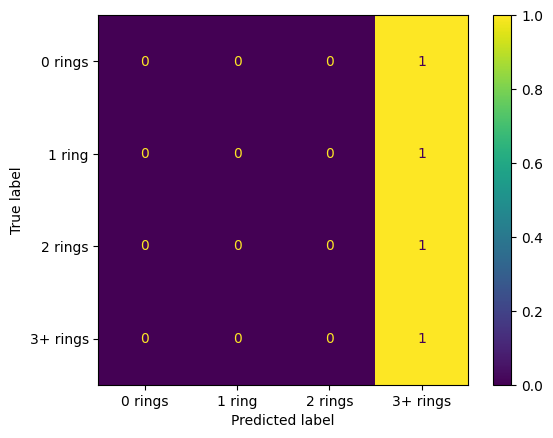

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["0 rings", "1 ring", "2 rings", "3+ rings"])
disp.plot()

plt.show()

In [24]:
def compute_integrated_gradient(batch_x, batch_blank, c, model,MODE = "max"):
    mean_grad = 0
    n = 64
    if MODE == "label":
          c = torch.argmax(c)
    for i in range(1, n + 1):
        x = batch_blank + i / n * (batch_x - batch_blank)
        x.requires_grad = True
        y = model(x).squeeze()
        if MODE == "label":

          y = y[c]
        if MODE == "pred":
          c = torch.argmax(y)
          y = y[c]

        #print(y.shape)
        (grad,) = torch.autograd.grad(y, x,is_grads_batched=False)
        mean_grad += grad / n

    integrated_gradients = (batch_x - batch_blank) * mean_grad
    integrated_gradients=integrated_gradients.detach().numpy()
    integrated_gradients = integrated_gradients / np.absolute(integrated_gradients).max()

    return integrated_gradients,c.detach().numpy().squeeze()

In [25]:
def get_IGs(test_dataset):
  IGs = []
  preds = []

  for i, (r,c) in enumerate(test_dataset):
    batch_x = r.unsqueeze(0)
    batch_blank = torch.zeros_like(batch_x)

    IG,pred = compute_integrated_gradient(batch_x, batch_blank, c, model,MODE="pred")

    IGs.append(IG.squeeze())
    preds.append(pred)

    if i > 127:
      break
  return(IGs,preds)
def plot_IG(dat,IG,pred):
  image,lab = dat
  image,lab = image.numpy().squeeze(),lab.numpy()
  f,ax = plt.subplots(1,2,figsize=(8,5))
  ax[0].matshow(image)
  ax[0].set_title(" class {}".format(np.argmax(lab)),fontsize=30)
  ax[1].matshow(IG,cmap="seismic",vmin=-1,vmax=1)
  ax[1].set_title("IG {}".format(pred),fontsize=30)
  print(np.unique(image))

In [26]:
def plot_IG(dat,IG,pred):
  image,lab = dat
  image,lab = image.numpy().squeeze(),lab.numpy()
  f,ax = plt.subplots(1,2,figsize=(8,5))
  ax[0].matshow(image)
  ax[0].set_title(" class {}".format(np.argmax(lab)),fontsize=30)
  ax[1].matshow(IG,cmap="seismic",vmin=-1,vmax=1)
  ax[1].set_title("IG {}".format(pred),fontsize=30)
  print(np.unique(image))

In [27]:
if 1:
  IGs,preds = get_IGs(test_dataset)
  for i in range(10):
    to_plot = i
    plot_IG(test_dataset[to_plot],IGs[to_plot],preds[to_plot])

In [28]:
im,lab = test_dataset[2]
print(im.shape)
print(lab.shape)

torch.Size([1, 16, 16])
torch.Size([4])


#TracIN example from Scratch

In [29]:
def get_gradients(x,lab, model,device="cpu"):
  #  function that takes a model and a element and returns gradient for that point
  model.eval()
  loss=0.0
  y = model(x)
  L = criterion(y, lab)
  params = # select the model parameter (as a list) you want to use to compute the gradient
  grads = # USE AUTOGRAD
  return list(grads)

def grad_dot_prod(grad_z0,grad_z1):
  #scalar product for all the gradients (iterated over the list)
    IF =  #scalar product for all the gradients (iterated over the list)
    return IF


SyntaxError: invalid syntax (<ipython-input-29-99d42df2bdb9>, line 8)

In [ ]:
grads = get_gradients(im.unsqueeze(0),lab.unsqueeze(0),model)
print(grads[0].shape) # this is the fist conv layer 16 kernels with 2x2 kernel size

In [ ]:
dotp = grad_dot_prod(grads,grads)# test the function
print("this is the gradients module : ", dotp)

In [ ]:
#list of chekpoints that we saved
ckp_list = []
for file in os.listdir("results/"):
    if file.startswith("ckp"):
        print("results/"+file)
        ckp_list.append("results/"+file)
ckp_list.sort()
assert len(lr_ckp  )==len(ckp_list)

In [ ]:
def load_model(ckp):
  # a function that load a model given a checkpoint path
  model=Net()
  model.load_state_dict(torch.load(ckp))
  model.eval()
  return model

In [ ]:
def tracIn(dataset,z_test,ckp_list,lr_ckp):
  train_dataset_size = len(dataset)
  ckp_iter=0
  influences = [0.0 for _ in range(train_dataset_size)]

  for c, ckp in enumerate(ckp_list):
    model = load_model(ckp)# carico il checkpoint
    lr=lr_ckp[c]

    im,lab = z_test

    grads_test = get_gradients(im.unsqueeze(0),lab.unsqueeze(0),model)

    for i in range(train_dataset_size):

          # llop aver trainig data and averages over ckp !!!

  influences = np.array(influences)
  opponents = np.argsort(influences)
  proponents = opponents[::-1]

  return influences, proponents, opponents



In [ ]:
#cut the dataset so we are faster
import torch.utils.data as data_utils
train_dataset = HitImageGenerator(X_train,y_train)
indices = torch.arange(256)
tr_small = data_utils.Subset(train_dataset, indices)

In [ ]:
influences, proponents, opponents = tracIn(tr_small,test_dataset[2],ckp_list,lr_ckp)

In [ ]:
influences[opponents[-1]]

In [ ]:
plt.figure()
_,_,_ = plt.hist(influences,25)
plt.xlabel("influence score")

In [ ]:
proponents

In [ ]:
def plot_proponents(dat,train_datatset):
  influences, proponents, opponents = tracIn(train_datatset,dat,ckp_list,lr_ckp)
  image,lab = dat
  image_p, lab_p = train_datatset[proponents[3]]
  image_o, lab_o = train_datatset[opponents[3]]
  image,lab = image.numpy().squeeze(),lab.numpy()
  image_p,lab_p = image_p.numpy().squeeze(),lab_p.numpy()
  image_o,lab_o = image_o.numpy().squeeze(),lab_o.numpy()
  f,ax = plt.subplots(1,3,figsize=(12,5))
  ax[0].matshow(image)
  ax[0].set_title(" class {}".format(np.argmax(lab)),fontsize=20)
  ax[1].matshow(image_p)
  ax[1].set_title(" Proponent class {}".format(np.argmax(lab_p)),fontsize=20)
  ax[2].matshow(image_o)
  ax[2].set_title(" Opponent class {}".format(np.argmax(lab_o)),fontsize=20)


In [ ]:
plot_proponents(test_dataset[4], tr_small)